## Regression

https://scikit-learn.org/stable/modules/linear_model.html

## Linear-Regression Toy Example

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [19]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

In [20]:
Y = np.dot(X, np.array([1, 2])) + 3

In [15]:
reg = LinearRegression()
reg = reg.fit(X,Y)

In [16]:
print(reg.score(X,Y))

1.0


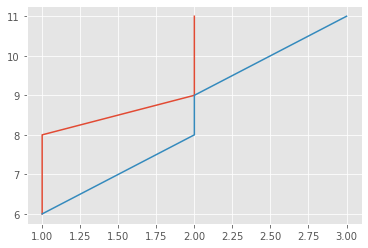

In [18]:
plt.plot(X,Y)
plt.show()

In [21]:
reg.predict(np.array([[3, 5]]))

array([16.])

* Score: - Returns the coefficient of determination R^2 of the prediction.

* The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
* The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

## Linear-Regression Dataset Example

* We are doing this on single variable for simplicity.
* We can extend it to multi-variable regression as well.

In [24]:
diabetes = datasets.load_diabetes()

In [32]:
diabetes_X = diabetes.data[:,np.newaxis,2]

In [33]:
diabetes_X.shape

(442, 1)

In [34]:
diabetes_Y = diabetes.target

In [35]:
diabetes_Y.shape

(442,)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X, diabetes_Y, random_state = 31, stratify = None, test_size = 0.2)

In [43]:
regr = LinearRegression()

In [44]:
regr = regr.fit(X_train, Y_train)

In [47]:
Y_pred = regr.predict(X_test)

In [48]:
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(Y_test, Y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [880.73931149]
Mean squared error: 2970.91
Variance score: 0.50


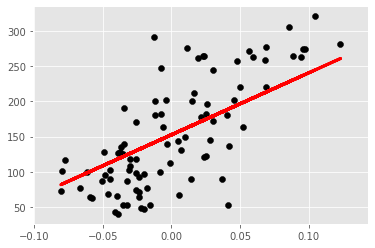

In [49]:
plt.scatter(X_test, Y_test, color = 'black')
plt.plot(X_test, Y_pred, color = 'red', linewidth = 3)
plt.show()

## Ridge Regression

* Linear least squares with l2 regularization.
$ ||y - Xw||^2_2 + \alpha * ||w||^2_2 $

* This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. 

The complexity parameter controls the amount of shrinkage: the larger the value of $ \alpha $, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

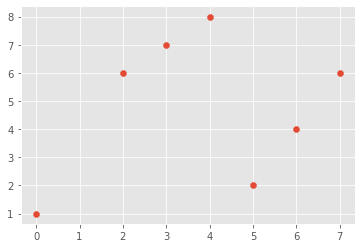

In [14]:
reg = Ridge(alpha = 0.5)
X = np.array([0,2,3,4,5,6,7]).reshape(1,-1)
Y = np.array([1,6,7,8,2,4,6]).reshape(1,-1)
plt.scatter(X,Y)
reg = reg.fit(X,Y)